<a href="https://colab.research.google.com/github/ahathaway821/COVID-19-Fact-Checking/blob/master/src/exploratory-analysis/fact_check_claim_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ahathaway821/COVID-19-Fact-Checking.git

Cloning into 'COVID-19-Fact-Checking'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 13 (delta 1), reused 5 (delta 0), pack-reused 0
Unpacking objects: 100% (13/13), done.


In [0]:
import pandas as pd
import os
import re
from wordcloud import WordCloud

In [42]:
claims = pd.read_csv('/content/COVID-19-Fact-Checking/data/poynterDataScraped27May2020.csv')
claims.head()

,When did you see the claim?,Country 1,Country 2,Country 3,Country 4,Countries,Organization,What did you fact-check?,Who said/posted it?,URL to fact-checked article (in your language),Final rating,Explanation
0,2020/05/25,Brazil,NaN,NaN,NaN,Brazil,Agência Lupa,"Brazilian states receive a R$ 16,450 extra fu...",Facebook,https://piaui.folha.uol.com.br/lupa/2020/05/25...,FALSE,"According to the Ministry of Health, this ext..."
1,2020/05/25,India,NaN,NaN,NaN,India,FactCrescendo,COVID-19 is a bacteria causing death due to t...,Facebook/WhatsApp,https://english.factcrescendo.com/2020/05/26/f...,FALSE,COVID-19 is a virus and the theory is baseles...
2,2020/05/25,Brazil,NaN,NaN,NaN,Brazil,Agência Lupa,A video shows a group of police officers salu...,Facebook,https://piaui.folha.uol.com.br/lupa/2020/05/25...,FALSE,"The video is real, but they were not saluting..."
3,2020/05/25,India,NaN,NaN,NaN,India,FactCrescendo,Video shows a doctor claiming that If you can...,Facebook/Twitter,https://marathi.factcrescendo.com/no-holding-y...,FALSE,""" Medical Experts have clarified that being ab..."
4,2020/05/25,Spain,United States,NaN,NaN,"Spain, United States",Maldita.es,A poem signed by K. O’Meara beginning with th...,Social media,https://maldita.es/malditobulo/2020/05/25/poem...,FALSE,"It is a hoax. The title of the poem is ""In th..."


In [0]:
def preprocess_columns(df, column_name):
  processed_column_name = column_name + '_processed'
  # Remove punctuation
  df[processed_column_name] = df[column_name].map(lambda x: re.sub('[,\.!?]', '', x))

  # Convert the titles to lowercase
  df[processed_column_name] = df[processed_column_name].map(lambda x: x.lower())

  # Remove overly common covid terms
  df[processed_column_name] = df[processed_column_name].map(lambda x: re.sub('coronavirus', '', x)) 
  df[processed_column_name] = df[processed_column_name].map(lambda x: re.sub('covid', '', x))
  df[processed_column_name] = df[processed_column_name].map(lambda x: re.sub('19', '', x))

  

In [0]:
preprocess_columns(claims, 'What did you fact-check?')
preprocess_columns(claims, 'Explanation')

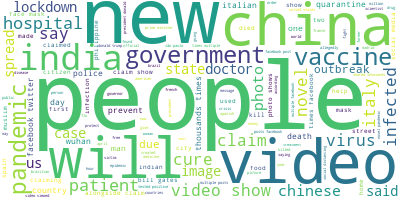

In [61]:
#def create_word_cloud(df, column_name):
df = claims
column_name = 'What did you fact-check?' + '_processed'
fact_checked_claim_processed = 'What did you fact-check?' + '_processed'
# Join the different processed titles together.
long_string = ','.join(list(df[column_name].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

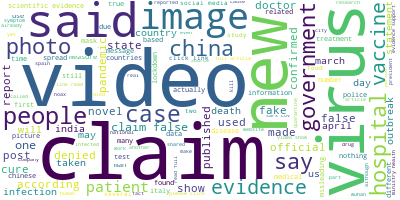

In [55]:
#def create_word_cloud(df, column_name):
df = claims
column_name = 'Explanation' + '_processed'

# Join the different processed titles together.
long_string = ','.join(list(df[column_name].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

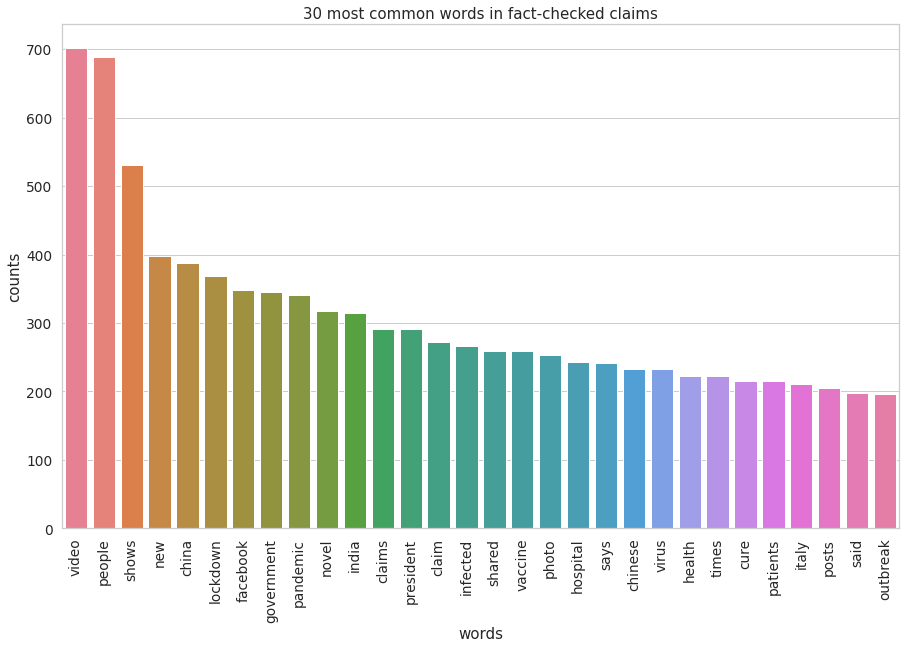

In [64]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_most_common_words(count_data, count_vectorizer, n=10):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:n]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title=f'{n} most common words in fact-checked claims')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(claims[fact_checked_claim_processed])
# Visualise the 10 most common words
plot_most_common_words(count_data, count_vectorizer, 30)

In [67]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 15
number_words = 5
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
people government shows video india

Topic #1:
people video italy shows streets

Topic #2:
president trump hospital news donald

Topic #3:
social media hospitals people claiming

Topic #4:
water drinking prevent virus hot

Topic #5:
people spread pandemic india predicted

Topic #6:
shows photo virus people died

Topic #7:
health cases confirmed new masks

Topic #8:
viral whatsapp claims infected masks

Topic #9:
lockdown india video shows people

Topic #10:
new deaths infected pandemic said

Topic #11:
china japanese nobel new wuhan

Topic #12:
video china shows minister police

Topic #13:
vaccine gates says new china

Topic #14:
facebook claim shared times posts


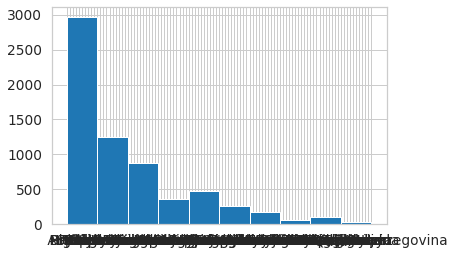

In [40]:
import matplotlib.pyplot as plt

plt.hist(claims['Country 1'])
plt.show()